In [ ]:
!pip install pandas numpy matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display


# Load Dataset

In [ ]:
df = pd.read_csv('/content/GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [ ]:
df.info()  # Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])

# EDA with Python

In [ ]:
df.describe()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,1932-12-16 00:11:33.975903744,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
min,1850-01-01 00:00:00,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,1891-06-23 12:00:00,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,1932-12-16 12:00:00,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,1974-06-08 12:00:00,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,2015-12-01 00:00:00,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000
std,NaN,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587


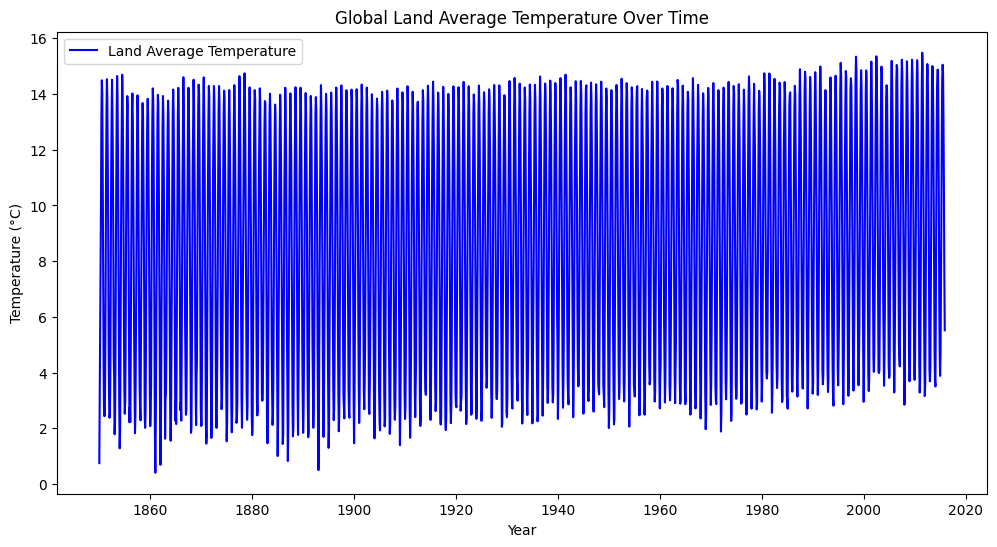

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['LandAverageTemperature'], color='blue', label='Land Average Temperature')
plt.title('Global Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

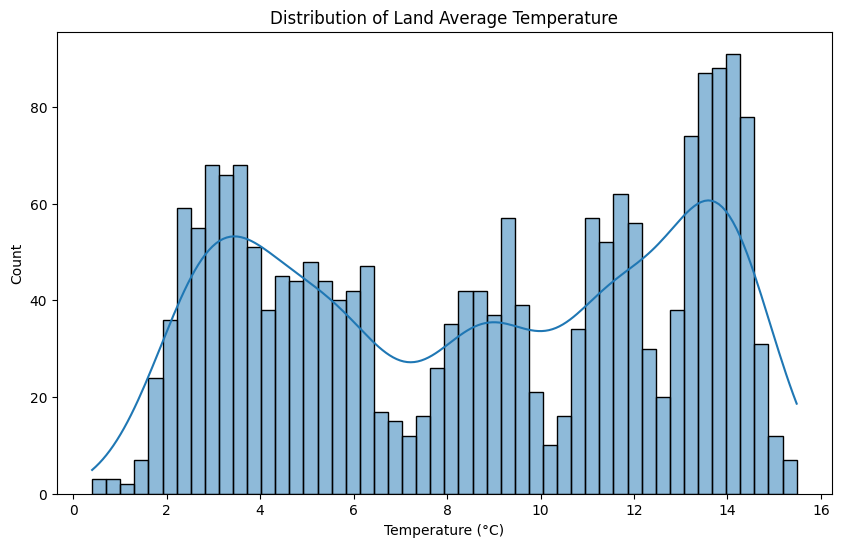

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LandAverageTemperature'], bins=50, kde=True)
plt.title('Distribution of Land Average Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

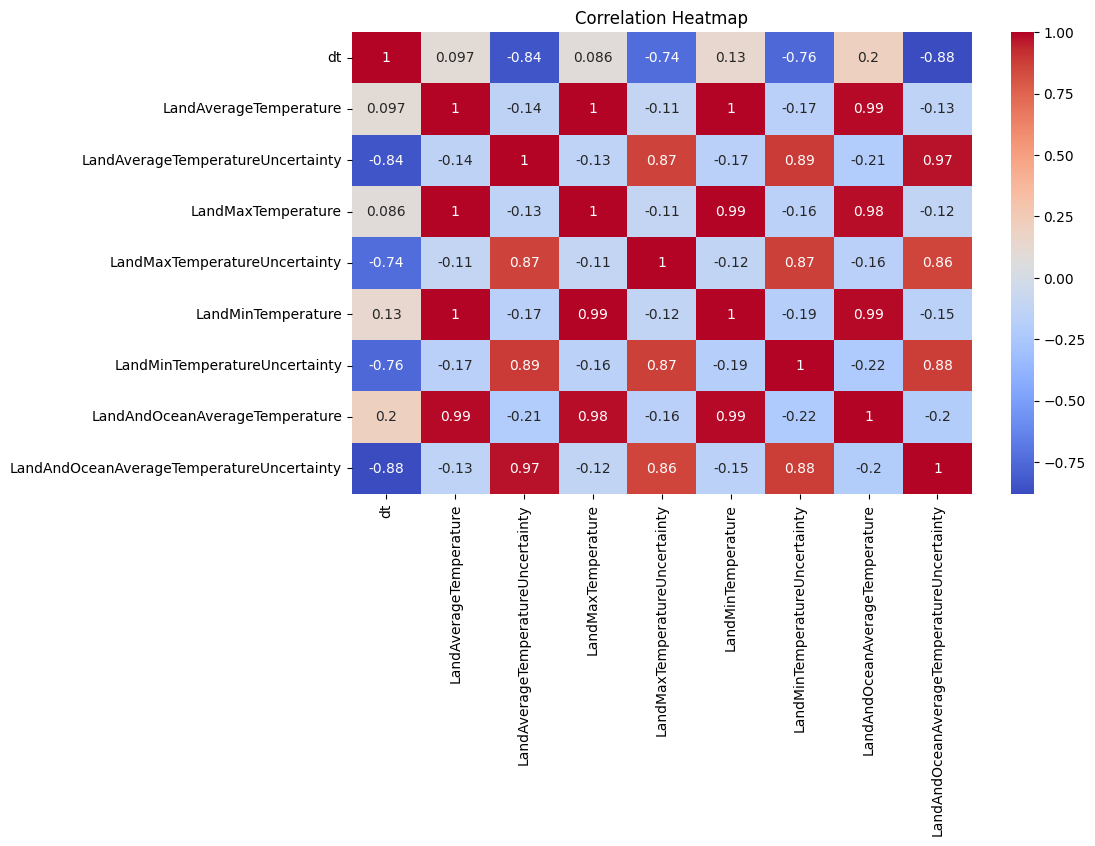

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# D3.js Visualizations

In [ ]:
# Convert the dataframe to a list of dictionaries
temperature_data = df[['dt', 'LandAverageTemperature']].dropna().to_dict(orient='records')

display(HTML('''
<div id="line-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
const data = ''' + str(temperature_data) + ''';

const margin = {top: 20, right: 30, bottom: 40, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#line-chart")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const parseTime = d3.timeParse("%Y-%m-%d");

data.forEach(d => {
  d.dt = parseTime(d.dt.split('T')[0]);
  d.LandAverageTemperature = +d.LandAverageTemperature;
});

const x = d3.scaleTime()
  .domain(d3.extent(data, d => d.dt))
  .range([0, width]);

const y = d3.scaleLinear()
  .domain([d3.min(data, d => d.LandAverageTemperature), d3.max(data, d => d.LandAverageTemperature)])
  .range([height, 0]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

svg.append("g")
  .call(d3.axisLeft(y));

svg.append("path")
  .datum(data)
  .attr("fill", "none")
  .attr("stroke", "steelblue")
  .attr("stroke-width", 1.5)
  .attr("d", d3.line()
    .x(d => x(d.dt))
    .y(d => y(d.LandAverageTemperature)));
</script>
'''))


In [ ]:
# Prepare the dataset: Convert dates to strings before sending to JavaScript
df['dt'] = df['dt'].astype(str)  # Convert to string format

# Sample some data to avoid overloading the frontend
temperature_data = df[['dt', 'LandAverageTemperature']].dropna().sample(1000).to_dict(orient='records')

# Check a sample of the data to ensure the date format
temperature_data[:5]  # Display first 5 records to check format


[{'dt': '1921-08-01', 'LandAverageTemperature': 13.561},
 {'dt': '1998-10-01', 'LandAverageTemperature': 9.941},
 {'dt': '2005-01-01', 'LandAverageTemperature': 3.808},
 {'dt': '1952-08-01', 'LandAverageTemperature': 13.964},
 {'dt': '1960-06-01', 'LandAverageTemperature': 13.484000000000002}]

In [ ]:
from IPython.display import HTML, display

# HTML and JS code for the line chart
display(HTML('''
<div id="line-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
const data = ''' + str(temperature_data) + ''';

const margin = {top: 20, right: 30, bottom: 40, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#line-chart")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const parseTime = d3.timeParse("%Y-%m-%d");

data.forEach(d => {
  d.dt = parseTime(d.dt.split(' ')[0]);  // Parse the date string correctly
  d.LandAverageTemperature = +d.LandAverageTemperature;
});

const x = d3.scaleTime()
  .domain(d3.extent(data, d => d.dt))
  .range([0, width]);

const y = d3.scaleLinear()
  .domain([d3.min(data, d => d.LandAverageTemperature), d3.max(data, d => d.LandAverageTemperature)])
  .range([height, 0]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

svg.append("g")
  .call(d3.axisLeft(y));

svg.append("path")
  .datum(data)
  .attr("fill", "none")
  .attr("stroke", "steelblue")
  .attr("stroke-width", 1.5)
  .attr("d", d3.line()
    .x(d => x(d.dt))
    .y(d => y(d.LandAverageTemperature)));
</script>
'''))


In [ ]:
!pip install mpld3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import mpld3

# Sample data for plotting
df_sample = df.sample(100)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_sample['dt'], df_sample['LandAverageTemperature'], color='blue', lw=2)

ax.set_title('Interactive Line Chart with mpld3')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

# Display the mpld3 plot
mpld3.display()


In [ ]:
# Prepare the dataset: Convert dates to strings before sending to JavaScript
df['dt'] = df['dt'].astype(str)  # Convert the date column to string

# Sample data to avoid overwhelming the frontend
sample_data = df[['dt', 'LandAverageTemperature']].dropna().sample(1000).to_dict(orient='records')


In [ ]:
from IPython.display import HTML, display

# HTML and JavaScript for the D3.js line chart
display(HTML('''
<div id="line-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>
const data = ''' + str(sample_data) + ''';

const margin = {top: 20, right: 30, bottom: 40, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#line-chart")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const parseTime = d3.timeParse("%Y-%m-%d");

data.forEach(d => {
  d.dt = parseTime(d.dt.split(' ')[0]);  // Parse the date string correctly
  d.LandAverageTemperature = +d.LandAverageTemperature;
});

const x = d3.scaleTime()
  .domain(d3.extent(data, d => d.dt))
  .range([0, width]);

const y = d3.scaleLinear()
  .domain([d3.min(data, d => d.LandAverageTemperature), d3.max(data, d => d.LandAverageTemperature)])
  .range([height, 0]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

svg.append("g")
  .call(d3.axisLeft(y));

svg.append("path")
  .datum(data)
  .attr("fill", "none")
  .attr("stroke", "steelblue")
  .attr("stroke-width", 1.5)
  .attr("d", d3.line()
    .x(d => x(d.dt))
    .y(d => y(d.LandAverageTemperature)));
</script>
'''))


In [ ]:
from IPython.display import HTML, display

# Sample the data for better visualization performance
sample_data = df[['dt', 'LandAverageTemperature']].dropna().sample(500).to_dict(orient='records')

display(HTML('''
<div id="scatter-plot"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

const data = ''' + str(sample_data) + ''';

const margin = {top: 20, right: 30, bottom: 50, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#scatter-plot")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const parseTime = d3.timeParse("%Y-%m-%d");

// Parse the date and convert temperature to numeric
data.forEach(d => {
  d.dt = parseTime(d.dt.split(' ')[0]);
  d.LandAverageTemperature = +d.LandAverageTemperature;
});

const x = d3.scaleTime()
  .domain(d3.extent(data, d => d.dt))
  .range([0, width]);

const y = d3.scaleLinear()
  .domain([d3.min(data, d => d.LandAverageTemperature), d3.max(data, d => d.LandAverageTemperature)])
  .range([height, 0]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

svg.append("g")
  .call(d3.axisLeft(y));

// Tooltip div
const tooltip = d3.select("body").append("div")
  .style("position", "absolute")
  .style("visibility", "hidden")
  .style("background-color", "white")
  .style("border", "solid")
  .style("border-width", "1px")
  .style("border-radius", "5px")
  .style("padding", "10px");

// Draw scatter plot
svg.selectAll("circle")
  .data(data)
  .enter()
  .append("circle")
  .attr("cx", d => x(d.dt))
  .attr("cy", d => y(d.LandAverageTemperature))
  .attr("r", 4)
  .attr("fill", "steelblue")
  .attr("opacity", 0.7)
  .on("mouseover", function(event, d) {
    tooltip.html("Date: " + d.dt.toDateString() + "<br>Temp: " + d.LandAverageTemperature.toFixed(2) + "°C")
      .style("visibility", "visible");
    d3.select(this).attr("r", 6).attr("fill", "orange");
  })
  .on("mousemove", function(event) {
    tooltip.style("top", (event.pageY - 10) + "px")
      .style("left", (event.pageX + 10) + "px");
  })
  .on("mouseout", function() {
    tooltip.style("visibility", "hidden");
    d3.select(this).attr("r", 4).attr("fill", "steelblue");
  });

</script>
'''))


In [ ]:
import pandas as pd

# Convert the date column to datetime and extract the month
df['dt'] = pd.to_datetime(df['dt'])
df['Month'] = df['dt'].dt.month

# Calculate average temperature by month
monthly_avg_temp = df.groupby('Month')['LandAverageTemperature'].mean().reset_index()

# Convert the data into a format suitable for JavaScript
bar_chart_data = monthly_avg_temp.to_dict(orient='records')

from IPython.display import HTML

display(HTML('''
<div id="bar-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

const data = ''' + str(bar_chart_data) + ''';

const margin = {top: 20, right: 30, bottom: 40, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#bar-chart")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const x = d3.scaleBand()
  .domain(data.map(d => d.Month))
  .range([0, width])
  .padding(0.1);

const y = d3.scaleLinear()
  .domain([0, d3.max(data, d => d.LandAverageTemperature)])
  .range([height, 0]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x).tickFormat(d => {
    const monthNames = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"];
    return monthNames[d - 1];
  }));

svg.append("g")
  .call(d3.axisLeft(y));

svg.selectAll(".bar")
  .data(data)
  .enter()
  .append("rect")
  .attr("class", "bar")
  .attr("x", d => x(d.Month))
  .attr("width", x.bandwidth())
  .attr("y", d => y(d.LandAverageTemperature))
  .attr("height", d => height - y(d.LandAverageTemperature))
  .attr("fill", "steelblue")
  .on("mouseover", function(event, d) {
    d3.select(this).attr("fill", "orange");
  })
  .on("mouseout", function(event, d) {
    d3.select(this).attr("fill", "steelblue");
  });

</script>
'''))


In [ ]:
# Prepare data for heatmap visualization
df['Year'] = df['dt'].dt.year

# Group by year and month, then compute the average temperature
heatmap_data = df.groupby(['Year', 'Month'])['LandAverageTemperature'].mean().reset_index()

# Convert to a format suitable for D3.js
heatmap_data_js = heatmap_data.to_dict(orient='records')

from IPython.display import HTML

display(HTML('''
<div id="heatmap"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

const data = ''' + str(heatmap_data_js) + ''';

const margin = {top: 20, right: 30, bottom: 40, left: 50},
      width = 800 - margin.left - margin.right,
      height = 500 - margin.top - margin.bottom;

const svg = d3.select("#heatmap")
  .append("svg")
  .attr("width", width + margin.left + margin.right)
  .attr("height", height + margin.top + margin.bottom)
  .append("g")
  .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

const x = d3.scaleBand()
  .domain(data.map(d => d.Month))
  .range([0, width])
  .padding(0.05);

const y = d3.scaleBand()
  .domain(data.map(d => d.Year))
  .range([height, 0])
  .padding(0.05);

const colorScale = d3.scaleSequential()
  .interpolator(d3.interpolateCool)
  .domain([d3.min(data, d => d.LandAverageTemperature), d3.max(data, d => d.LandAverageTemperature)]);

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x).tickFormat(d => {
    const monthNames = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"];
    return monthNames[d - 1];
  }));

svg.append("g")
  .call(d3.axisLeft(y));

svg.selectAll("rect")
  .data(data)
  .enter()
  .append("rect")
  .attr("x", d => x(d.Month))
  .attr("y", d => y(d.Year))
  .attr("width", x.bandwidth())
  .attr("height", y.bandwidth())
  .style("fill", d => colorScale(d.LandAverageTemperature))
  .on("mouseover", function(event, d) {
    d3.select(this).style("stroke", "black").style("stroke-width", 2);
  })
  .on("mouseout", function(event, d) {
    d3.select(this).style("stroke", "none");
  });

</script>
'''))


In [ ]:
# Create bins for temperature ranges
df['TemperatureRange'] = pd.cut(
    df['LandAverageTemperature'],
    bins=[-np.inf, 0, 10, 20, 30, np.inf],
    labels=['Below 0°C', '0-10°C', '10-20°C', '20-30°C', 'Above 30°C']
)

# Group by temperature range and count the occurrences
temperature_range_counts = df['TemperatureRange'].value_counts().reset_index()
temperature_range_counts.columns = ['Range', 'Count']

# Convert to a format suitable for D3.js
pie_chart_data = temperature_range_counts.to_dict(orient='records')


In [ ]:
from IPython.display import HTML, display

display(HTML('''
<div id="pie-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

// Data for the pie chart
const data = ''' + str(pie_chart_data) + ''';

// Set dimensions and radius for the pie chart
const width = 450, height = 450, margin = 40;
const radius = Math.min(width, height) / 2 - margin;

// Append SVG element to the div
const svg = d3.select("#pie-chart")
  .append("svg")
  .attr("width", width)
  .attr("height", height)
  .append("g")
  .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

// Set the color scale
const color = d3.scaleOrdinal()
  .domain(data.map(d => d.Range))
  .range(d3.schemeCategory10);

// Compute the position of each group on the pie chart
const pie = d3.pie()
  .value(d => d.Count);

const arc = d3.arc()
  .innerRadius(0) // This is the inner radius for a pie chart (0 for full pie, >0 for donut)
  .outerRadius(radius);

// Build the pie chart
svg.selectAll('slices')
  .data(pie(data))
  .enter()
  .append('path')
  .attr('d', arc)
  .attr('fill', d => color(d.data.Range))
  .attr("stroke", "white")
  .style("stroke-width", "2px")
  .style("opacity", 0.8);

// Add labels to the pie chart slices
svg.selectAll('labels')
  .data(pie(data))
  .enter()
  .append('text')
  .text(d => d.data.Range)
  .attr("transform", d => "translate(" + arc.centroid(d) + ")")
  .style("text-anchor", "middle")
  .style("font-size", 15);

</script>
'''))


In [ ]:
from IPython.display import HTML, display

display(HTML('''
<div id="pie-chart"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

// Data for the pie chart
const data = ''' + str(pie_chart_data) + ''';

// Set dimensions and radius for the pie chart
const width = 450, height = 450, margin = 40;
const radius = Math.min(width, height) / 2 - margin;

// Append SVG element to the div
const svg = d3.select("#pie-chart")
  .append("svg")
  .attr("width", width)
  .attr("height", height)
  .append("g")
  .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

// Set the color scale
const color = d3.scaleOrdinal()
  .domain(data.map(d => d.Range))
  .range(d3.schemeCategory10);

// Compute the position of each group on the pie chart
const pie = d3.pie()
  .value(d => d.Count);

const arc = d3.arc()
  .innerRadius(0)
  .outerRadius(radius);

// Arc generator for the labels (to position them further out)
const labelArc = d3.arc()
  .innerRadius(radius * 0.8)
  .outerRadius(radius * 1.4);

// Build the pie chart
svg.selectAll('slices')
  .data(pie(data))
  .enter()
  .append('path')
  .attr('d', arc)
  .attr('fill', d => color(d.data.Range))
  .attr("stroke", "white")
  .style("stroke-width", "2px")
  .style("opacity", 0.8);

// Add label lines (leader lines)
svg.selectAll('lines')
  .data(pie(data))
  .enter()
  .append('polyline')
  .attr("stroke", "black")
  .style("stroke-width", 1)
  .style("fill", "none")
  .attr("points", function(d) {
    const posA = arc.centroid(d);          // Line starting point (at the slice)
    const posB = labelArc.centroid(d);     // Line middle point (slightly outside the slice)
    const posC = labelArc.centroid(d);     // Line ending point (where the label is)
    posC[0] = radius * 1.5 * (midAngle(d) < Math.PI ? 1 : -1); // Align the label
    return [posA, posB, posC];
  });

// Add labels to the slices
svg.selectAll('labels')
  .data(pie(data))
  .enter()
  .append('text')
  .text(d => d.data.Range)
  .attr("transform", function(d) {
    const pos = labelArc.centroid(d);
    pos[0] = radius * 1.5 * (midAngle(d) < Math.PI ? 1 : -1);  // Align the text
    return "translate(" + pos + ")";
  })
  .style("text-anchor", function(d) {
    return midAngle(d) < Math.PI ? "start" : "end";
  })
  .style("font-size", 12);

// Helper function to calculate the middle angle of each slice
function midAngle(d) {
  return d.startAngle + (d.endAngle - d.startAngle) / 2;
}

</script>
'''))


In [ ]:
# Download